## Import necessary modules and read in data

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.stats import multitest
import statsmodels.api as sm
from statsmodels.formula.api import ols

# read in data

data = pd.read_csv("trait_data.csv")


# OVERALL CONTENTS

1. CORRELATE EACH TRAIT FOR EACH YEAR (1995-1999) WITH EACH RING FEATURE
2. CALCULATE AND VISUALIZE THE PERCENT CONTRIBUTION OF ROOTSTOCK TO TOTAL TRUNK WIDTH IN CHARDONNAY AND CABERNET SAUVIGNON
3. PH AND TOTAL TRUNK DIAMETER (cm)
4. TITRATABLE ACIDITY (g/L) AND TOTAL TRUNK DIAMETER (cm)
5. YIELD DIVIDED BY PRUNING WEIGHT (RAVAZ INDEX) AND TOTAL TRUNK DIAMETER (cm)
6. PRUNING WEIGHT AND TOTAL TRUNK DIAMETER (cm)

_____
# 1. CORRELATE EACH TRAIT FOR EACH YEAR (1995-1999) WITH EACH RING FEATURE

1. Create lists of each trait for each year and each scion to correlate with each ring feature
2. Loop through and perform each correlation (up to 1520 correlations)
3. Double check correlation outputs. Only 1460 correlations because of missing data
4. Perform Benjamini-Hochberg multiple test correction. 53 siginificant correlations < 0.05 p-value
5. Plot FDR BH corrected p-values against original p-values. Use -log10(p-value)
6. Print out and inspect significant correlations after mutiple test adjustment
7. Create a pandas dataframe with the trait and scion name, ringe feature, and Spearman's rank correlation coefficient
8. Create a heatmap of significant correlations after multiple test adjustment
_____

## Create lists of each trait for each year and each scion to correlate with each ring feature

In [2]:
# In order to loop through correlations,
# create lists of factor levels for:
# scions, traits, years, and rings
# note: trait_names renames traits to impose order to factor levels

scions = ["Cab","Chard"]
traits = ["soluble_solids_content","titratable_acidity_gL","pH","berry_weight_g",
          "yield_kg","cluster_number","pruning_weight_kg","yield_div_pruning_weight"]
trait_names = ["05_soluble_solids_content","03_titratable_acidity_gL","00_pH","07_berry_weight_g",
          "06_yield_kg","04_cluster_number","02_pruning_weight_kg","01_yield_div_pruning_weight"]
years = [1995, 1996, 1997, 1998, 1999]
rings = ["early_1","late_1","early_2","late_2","early_3","late_3","early_4","late_4",
         "early_5","late_5","early_6","late_6","early_7","late_7","early_8","late_8",
         "outer_rings","cambium","total_width"]


## Loop through and perform each correlation (up to 1520)

In [3]:
#############################################################
# CORRELATE EACH RING FEATURE WITH EACH TRAIT FROM EACH YEAR
#############################################################

corr_vals = [] # to store Spearman's rank correlation coefficient
p_vals = [] # to store correlation p-value

scion_output = [] # store scion identity of correlation
trait_output = [] # store trait identity of correlation
year_output = [] # store year identity of correlation
ring_output = [] # store ring feature that was correlated

for s in scions: # loop over and select each scion
    
    scion = data[data["scion"]==s]

    for y in years: # loop over and select each year

        year = scion[scion["year"]==y]
        
        for t in traits: # then, select each trait in turn
        
            trait = year[t]
            trait_ind = traits.index(t) # store the trait index so that it can be renamed
            
            for r in rings:
                
                ring = year[r] # then, select each ring feature in turn
                
                corr_val = stats.spearmanr(trait, ring)[0] # calculate Spearman's rank correlation coefficient
                p_val = stats.spearmanr(trait, ring)[1] # calculate the p-value
                
                if np.isnan(corr_val): # if missig data and nan, pass over and proceed to next correlation
                    
                    pass
                
                else: # if there is a correlation, store the results
                    
                    corr_vals.append(corr_val) # store Spearman's rank correlation coefficient and p value
                    p_vals.append(p_val)

                    scion_output.append(s) # store associated 
                    trait_output.append(trait_names[trait_ind])
                    year_output.append(y)
                    ring_output.append(r)

## Double check correlation outputs. Only 1460 correlations because of missing data

In [4]:
# 8 traits X 5 years X 2 scions = 80 traits
# 19 ring measurements
# 80 traits x 19 ring measurements = 1520 possible correlations

# However, because of missing data, there are only 1406 correlations

print(len(corr_vals))
print(len(p_vals))
print(len(scion_output))
print(len(trait_output))
print(len(year_output))
print(len(ring_output))

1406
1406
1406
1406
1406
1406


## Perform Benjamini-Hochberg multiple test correction. 53 siginificant correlations < 0.05 p-value

In [5]:
multitest_pvals = multitest.multipletests(p_vals, method="fdr_bh")[1]

sum(multitest_pvals<0.05)

53

## Plot FDR BH corrected p-values against original p-values. Use -log10(p-value)

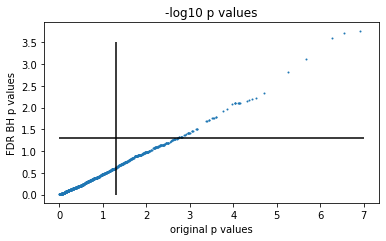

In [6]:
plt.scatter(-np.log10(p_vals), -np.log10(multitest_pvals), s=1)

plt.vlines(-np.log10(0.05),0,3.5)
plt.hlines(-np.log10(0.05),0,7)
plt.xlabel("original p values")
plt.ylabel("FDR BH p values")
plt.title("-log10 p values")
plt.gca().set_aspect("equal")


## Print out and inspect significant correlations after mutiple test adjustment

In [7]:
for i in range(len(multitest_pvals)):
    
    if multitest_pvals[i] < 0.05:
        
        scion = scion_output[i]
        trait = trait_output[i]
        year = year_output[i]
        ring = ring_output[i]
        
        print(-np.log10(multitest_pvals[i]),corr_vals[i],scion, trait, year, ring)

1.4114577836670774 0.4312701442531488 Cab 04_cluster_number 1995 early_4
1.3025569857666257 0.4136182633488694 Cab 04_cluster_number 1995 early_5
1.3143124697355457 0.41595169072712296 Cab 03_titratable_acidity_gL 1996 early_4
1.7640696243338918 0.47390966528064493 Cab 03_titratable_acidity_gL 1996 total_width
1.41296675272805 0.4339504164769816 Cab 02_pruning_weight_kg 1996 early_2
1.4114577836670774 0.4316769617244385 Cab 03_titratable_acidity_gL 1999 early_7
1.4981743259249107 0.4460881659561612 Cab 02_pruning_weight_kg 1999 early_8
1.3301661906237991 -0.4190966266437964 Cab 01_yield_div_pruning_weight 1999 total_width
1.6926723257366258 -0.45288767035585303 Chard 03_titratable_acidity_gL 1995 early_4
2.1149888622346644 -0.5004387659676443 Chard 03_titratable_acidity_gL 1995 early_5
2.1125182271339495 -0.495115639905983 Chard 03_titratable_acidity_gL 1995 early_7
1.4500237273358654 -0.4289421861109213 Chard 07_berry_weight_g 1995 early_4
1.4500237273358654 0.42984020531456857 Chard 

## Create a pandas dataframe with the trait and scion name, ringe feature, and Spearman's rank correlation coefficient and p-value

In [8]:
rows = []

for i in range(len(multitest_pvals)):
    
    if multitest_pvals[i] < 0.05: 
        
        corr_val = corr_vals[i]
        
        scion = scion_output[i]
        trait = trait_output[i]
        year = year_output[i]
        ring = ring_output[i]
        
        name = trait + "." + scion + "." + str(year)
        
        rows.append([name, ring, corr_val])
        
df = pd.DataFrame(rows, columns=["trait_name", "ring", "corr"])

In [9]:
df # check that the dataframe is correct

,trait_name,ring,corr
0,04_cluster_number.Cab.1995,early_4,0.431270
1,04_cluster_number.Cab.1995,early_5,0.413618
2,03_titratable_acidity_gL.Cab.1996,early_4,0.415952
3,03_titratable_acidity_gL.Cab.1996,total_width,0.473910
4,02_pruning_weight_kg.Cab.1996,early_2,0.433950
5,03_titratable_acidity_gL.Cab.1999,early_7,0.431677
6,02_pruning_weight_kg.Cab.1999,early_8,0.446088
7,01_yield_div_pruning_weight.Cab.1999,total_width,-0.419097
8,03_titratable_acidity_gL.Chard.1995,early_4,-0.452888
9,03_titratable_acidity_gL.Chard.1995,early_5,-0.500439


## Create a heatmap of significant correlations after multiple test adjustment

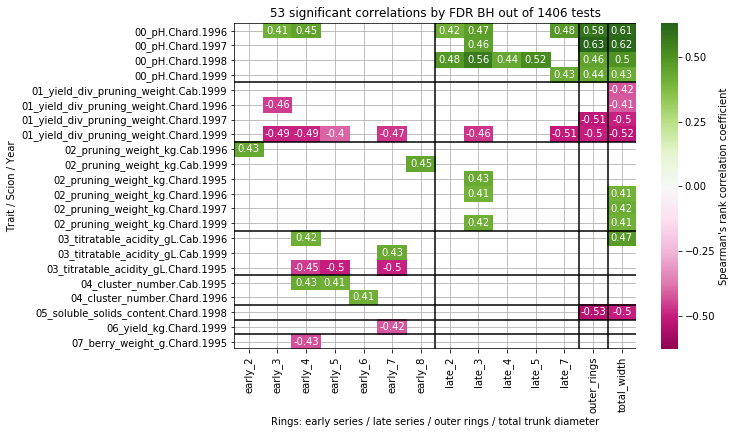

In [10]:
heatmap_table = df.pivot("trait_name","ring","corr")
f, ax = plt.subplots(figsize=(9, 6))
h = sns.heatmap(heatmap_table, annot=True,  linewidths=0, ax=ax, center=0, cmap="PiYG", vmin=-0.63, vmax=0.63, cbar_kws={'label': "Spearman's rank correlation coefficient"})
plt.grid()
ax.set_axisbelow(True)
h.set_xlabel('Rings: early series / late series / outer rings / total trunk diameter', fontsize=10)
h.set_ylabel('Trait / Scion / Year', fontsize=10)
plt.vlines([0,7,12,13], 0, 22)
plt.hlines([0,4,8,14,17,19,20,21,22], 0, 14)
plt.title("53 significant correlations by FDR BH out of 1406 tests")
plt.savefig("00_correlation_heatmap.jpg", bbox_inches="tight")


_______
# 2. CALCULATE AND VISUALIZE THE PERCENT CONTRIBUTION OF ROOTSTOCK TO TOTAL TRUNK WIDTH IN CHARDONNAY AND CABERNET SAUVIGNON

1. Scion explains 47.72% variation in total trunk width overall
2. Rootstock expains 31.09% variation in total trunk width for Chardonnay
3. Rootstock expains 49.9% variation in total trunk width for Cabernet sauvignon
4. Plot of trunk diameter by rootstock for Chardonnay and Cabernet sauvignon
________

## Scion expains 47.72% variation in total trunk width overall

In [11]:
data_1995 = data[(data["year"]==1995)] # select one year to remove redundancy

scion_lm = ols("total_width~scion", data=data_1995).fit() # perform one-way ANOVA
sm.stats.anova_lm(scion_lm) # print out ANOVA results


,df,sum_sq,mean_sq,F,PR(>F)
scion,1.0,25.591512,25.591512,99.496978,4.869623e-17
Residual,109.0,28.035775,0.257209,NaN,NaN


In [12]:
# calculate the percent variation of total trunk width explained by scion

print("Scion explains", round(25.591512/(25.591512+28.035775)*100,2), "percent variation in total trunk width overall")

Scion explains 47.72 percent variation in total trunk width overall


## Rootstock expains 31.09% variation in total trunk width for Chardonnay

In [13]:
data_chard = data[(data["scion"]=="Chard")] # select just chardonnay data with a mask
data_chard_1995 = data_chard[(data_chard["year"]==1995)] # select one year to remove redundancy

chard_lm = ols("total_width~rootstock", data=data_chard_1995).fit() # perform one-way ANOVA
sm.stats.anova_lm(chard_lm) # print out ANOVA results


,df,sum_sq,mean_sq,F,PR(>F)
rootstock,14.0,5.77263,0.412331,1.353289,0.21889
Residual,42.0,12.79689,0.304688,NaN,NaN


In [14]:
# calculate the percent variation of total trunk width explained by rootstock

print("Rootstock explains", round(5.77263/(5.77263+12.79689)*100,2), "percent variation in total trunk width for Chardonnay")


Rootstock explains 31.09 percent variation in total trunk width for Chardonnay


## Rootstock expains 49.9% variation in total trunk width for Cabernet sauvignon

In [15]:
data_cab = data[(data["scion"]=="Cab")] # select just cabernet sauvignon data with a mask
data_cab_1995 = data_cab[(data_cab["year"]==1995)] # select one year to remove redundancy

cab_lm = ols("total_width~rootstock", data=data_cab_1995).fit() # perform one-way ANOVA
sm.stats.anova_lm(cab_lm) # print out ANOVA results


,df,sum_sq,mean_sq,F,PR(>F)
rootstock,14.0,4.723561,0.337397,2.774476,0.006027
Residual,39.0,4.742694,0.121608,NaN,NaN


In [16]:
# calculate the percent variation of total trunk width explained by rootstock

print("Rootstock explains", round(4.723561/(4.723561+4.742694)*100,2), "percent variation in total trunk width for Cabernet Sauvignon")

Rootstock explains 49.9 percent variation in total trunk width for Cabernet Sauvignon


## Plot of trunk diameter by rootstock for Chardonnay and Cabernet sauvignon

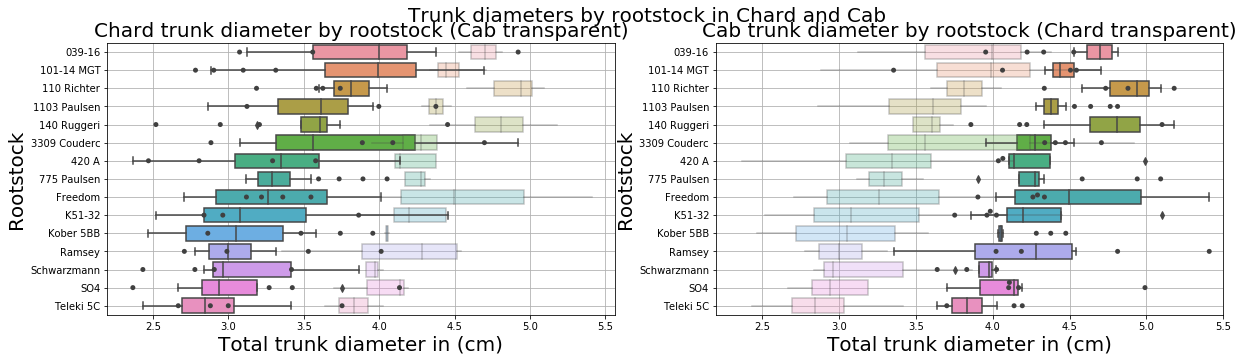

In [17]:
#################
# SET UP SUBPLOTS
#################

fig, axes = plt.subplots(1,2,figsize=(20, 5))
fig.suptitle("Trunk diameters by rootstock in Chard and Cab", fontsize=20)

############################################################################
# CREATE SUBPLOT OF CHARD TRUNK DIAMETER BY ROOTSTOCK (WITH CAB TRANSPARENT)
############################################################################

sns.boxplot(ax=axes[0],data=data_chard_1995, x="total_width", y="rootstock",
                    order=["1103 Paulsen","3309 Couderc","775 Paulsen",
                             "Kober 5BB","110 Richter","039-16","SO4","Freedom",
                            "Ramsey","140 Ruggeri","420 A","101-14 MGT","K51-32",
                            "Teleki 5C","Schwarzmann"])
sns.boxplot(ax=axes[0],data=data_cab_1995, x="total_width", y="rootstock",
                    order=["1103 Paulsen","3309 Couderc","775 Paulsen",
                             "Kober 5BB","110 Richter","039-16","SO4","Freedom",
                            "Ramsey","140 Ruggeri","420 A","101-14 MGT","K51-32",
                            "Teleki 5C","Schwarzmann"], 
                    boxprops=dict(alpha=.3),whiskerprops=dict(alpha=.3),capprops=dict(alpha=0),
                    flierprops=dict(alpha=0),medianprops=dict(alpha=.3))
sns.swarmplot(ax=axes[0],data=data_chard_1995, x="total_width", y="rootstock", color="0.25", zorder=10)
axes[0].set_xlabel('Total trunk diameter in (cm)', fontsize=20)
axes[0].set_ylabel('Rootstock', fontsize=20)
axes[0].set_title('Chard trunk diameter by rootstock (Cab transparent)', fontsize=20)
plt.xlim(2.2, 5.5)
axes[0].grid()
axes[0].set_axisbelow(True)

############################################################################
# CREATE SUBPLOT OF CAB TRUNK DIAMETER BY ROOTSTOCK (WITH CHARD TRANSPARENT)
############################################################################

sns.boxplot(ax=axes[1],data=data_cab_1995, x="total_width", y="rootstock",
                    order=["1103 Paulsen","3309 Couderc","775 Paulsen",
                             "Kober 5BB","110 Richter","039-16","SO4","Freedom",
                            "Ramsey","140 Ruggeri","420 A","101-14 MGT","K51-32",
                            "Teleki 5C","Schwarzmann"])
sns.boxplot(ax=axes[1],data=data_chard_1995, x="total_width", y="rootstock",
                    order=["1103 Paulsen","3309 Couderc","775 Paulsen",
                             "Kober 5BB","110 Richter","039-16","SO4","Freedom",
                            "Ramsey","140 Ruggeri","420 A","101-14 MGT","K51-32",
                            "Teleki 5C","Schwarzmann"], 
                    boxprops=dict(alpha=.3),whiskerprops=dict(alpha=.3),capprops=dict(alpha=0),
                    flierprops=dict(alpha=0),medianprops=dict(alpha=.3))
sns.swarmplot(ax=axes[1],data=data_cab_1995, x="total_width", y="rootstock", color="0.25", zorder=10)
axes[1].set_xlabel('Total trunk diameter in (cm)', fontsize=20)
axes[1].set_ylabel('Rootstock', fontsize=20)
axes[1].set_title('Cab trunk diameter by rootstock (Chard transparent)', fontsize=20)
plt.xlim(2.2, 5.5)
axes[1].grid()
axes[1].set_axisbelow(True)

plt.savefig("01_boxplots_trunk_diameter.jpg", bbox_inches="tight")


_____
# PH AND TOTAL TRUNK DIAMETER (cm)
_______

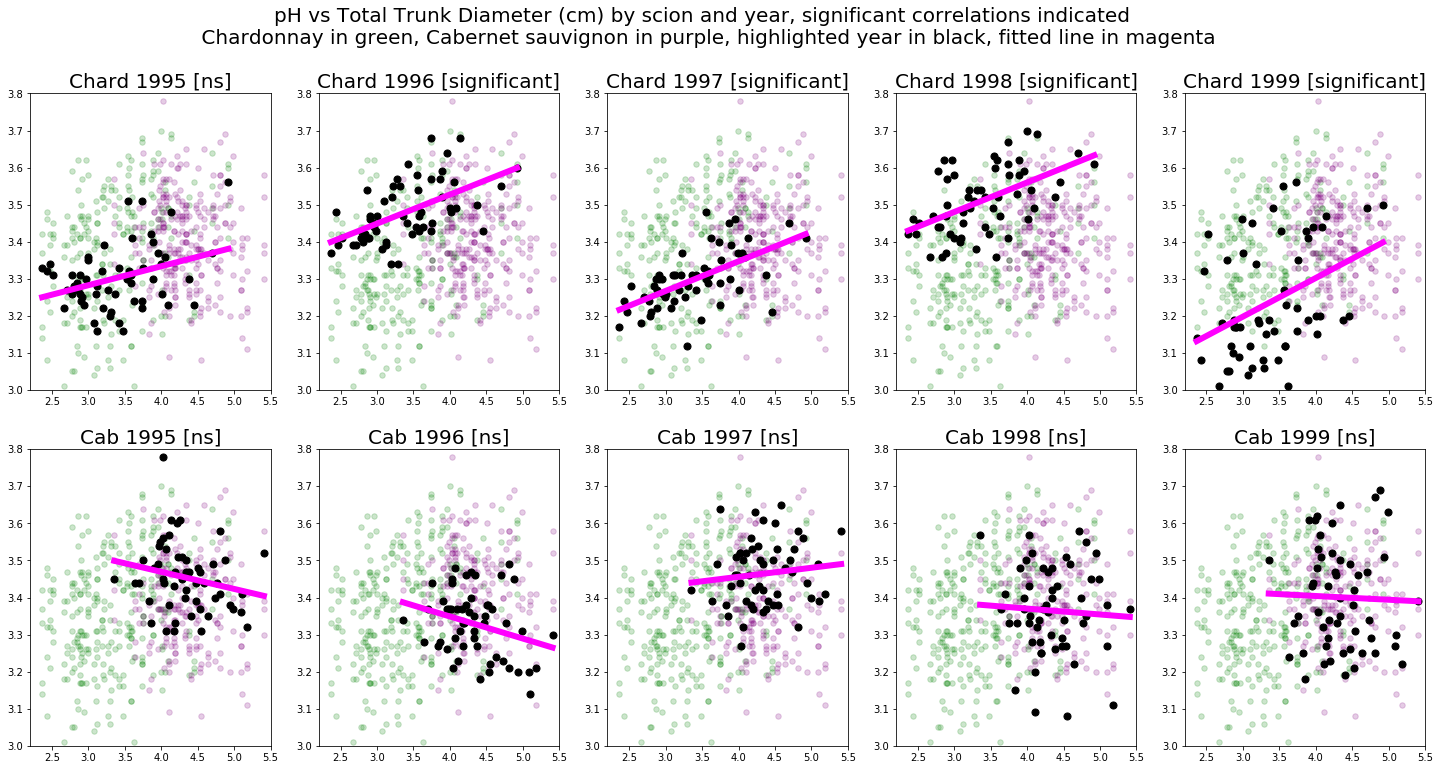

In [18]:
sel_trait = "pH" # select the trait to make aa plot for

############################################################
# SELECT CHARDONNAY AND CABERNET SAUVIGNON DATA BY EACH YEAR
############################################################

data_chard = data[(data["scion"]=="Chard")] # select just chardonnay data with a mask
data_chard_1995 = data_chard[(data_chard["year"]==1995)] # select each year of chardonnay data with a mask
data_chard_1996 = data_chard[(data_chard["year"]==1996)]
data_chard_1997 = data_chard[(data_chard["year"]==1997)]
data_chard_1998 = data_chard[(data_chard["year"]==1998)]
data_chard_1999 = data_chard[(data_chard["year"]==1999)]

data_cab = data[(data["scion"]=="Cab")] # select just cabernet sauvignon data with a mask
data_cab_1995 = data_cab[(data_cab["year"]==1995)] # select each year of cabernet sauvignon data with a mask
data_cab_1996 = data_cab[(data_cab["year"]==1996)]
data_cab_1997 = data_cab[(data_cab["year"]==1997)]
data_cab_1998 = data_cab[(data_cab["year"]==1998)]
data_cab_1999 = data_cab[(data_cab["year"]==1999)]

#############################################################
# MODEL DATA AS LINEAR FUNCTIONN FOR EACH SCION FOR EACH YEAR
#############################################################

chard1995_func = np.poly1d(np.polyfit(data_chard_1995["total_width"],data_chard_1995[sel_trait],1))
chard1996_func = np.poly1d(np.polyfit(data_chard_1996["total_width"],data_chard_1996[sel_trait],1))
chard1997_func = np.poly1d(np.polyfit(data_chard_1997["total_width"],data_chard_1997[sel_trait],1))
chard1998_func = np.poly1d(np.polyfit(data_chard_1998["total_width"],data_chard_1998[sel_trait],1))
chard1999_func = np.poly1d(np.polyfit(data_chard_1998["total_width"],data_chard_1999[sel_trait],1))
cab1995_func = np.poly1d(np.polyfit(data_cab_1995["total_width"],data_cab_1995[sel_trait],1))
cab1996_func = np.poly1d(np.polyfit(data_cab_1996["total_width"],data_cab_1996[sel_trait],1))
cab1997_func = np.poly1d(np.polyfit(data_cab_1997["total_width"],data_cab_1997[sel_trait],1))
cab1998_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1998[sel_trait],1))
cab1999_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1999[sel_trait],1))

#####################
# SET PLOT PARAMETERS
#####################

low_x = 2.2 # lower x axis limit 
high_x = 5.5 # upper x axis limit 
low_y = 3.0 # lower y axis limit 
high_y = 3.8 # upper y axis limit 
alpha_bg = 0.2 # alpha chard/cab background data 
col_chard = "green" # color chardonnay 
col_cab = "purple" # color cabernet 
col_sel = "k" # selected data color 
col_fit = "magenta" # fitted line color
s_sel = 50 # selected data size
s_bg = 30 # background data size
lw_fit = 6 # fitted line width
fs_suptitle = 20 # main title fontsize
fs_subtitle = 20 # subtitle fontsize

###############
# PLOT THE DATA
###############

plt.figure(figsize=(25,12)) # set overall figure size

# Chardonnay

plt.subplot(2,5,1) # Chard 1995
plt.scatter(data_chard_1995["total_width"],data_chard_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100),
        chard1995_func(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,2) # Chard 1996
plt.scatter(data_chard_1996["total_width"],data_chard_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100),
        chard1996_func(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1996 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,3) # Chard 1997
plt.scatter(data_chard_1997["total_width"],data_chard_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100),
        chard1997_func(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1997 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,4) # Chard 1998
plt.scatter(data_chard_1998["total_width"],data_chard_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100),
        chard1998_func(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1998 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,5) # Chard 1999
plt.scatter(data_chard_1999["total_width"],data_chard_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100),
        chard1999_func(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1999 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# Cabernet

plt.subplot(2,5,6) # Cab 1995
plt.scatter(data_cab_1995["total_width"],data_cab_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100),
        cab1995_func(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,7) # Cab 1996
plt.scatter(data_cab_1996["total_width"],data_cab_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100),
        cab1996_func(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1996 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,8) # Cab 1997
plt.scatter(data_cab_1997["total_width"],data_cab_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100),
        cab1997_func(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1997 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,9) # Cab 1998
plt.scatter(data_cab_1998["total_width"],data_cab_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100),
        cab1998_func(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1998 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,10) # Cab 1999
plt.scatter(data_cab_1999["total_width"],data_cab_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100),
        cab1999_func(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1999 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# set overall plot title
plt.suptitle("pH vs Total Trunk Diameter (cm) by scion and year, significant correlations indicated \n Chardonnay in green, Cabernet sauvignon in purple, highlighted year in black, fitted line in magenta", fontsize=fs_suptitle)
plt.savefig("02_pH.jpg", bbox_inches="tight")

_____
# TITRATABLE ACIDITY (g/L) AND TOTAL TRUNK DIAMETER (cm)
_______

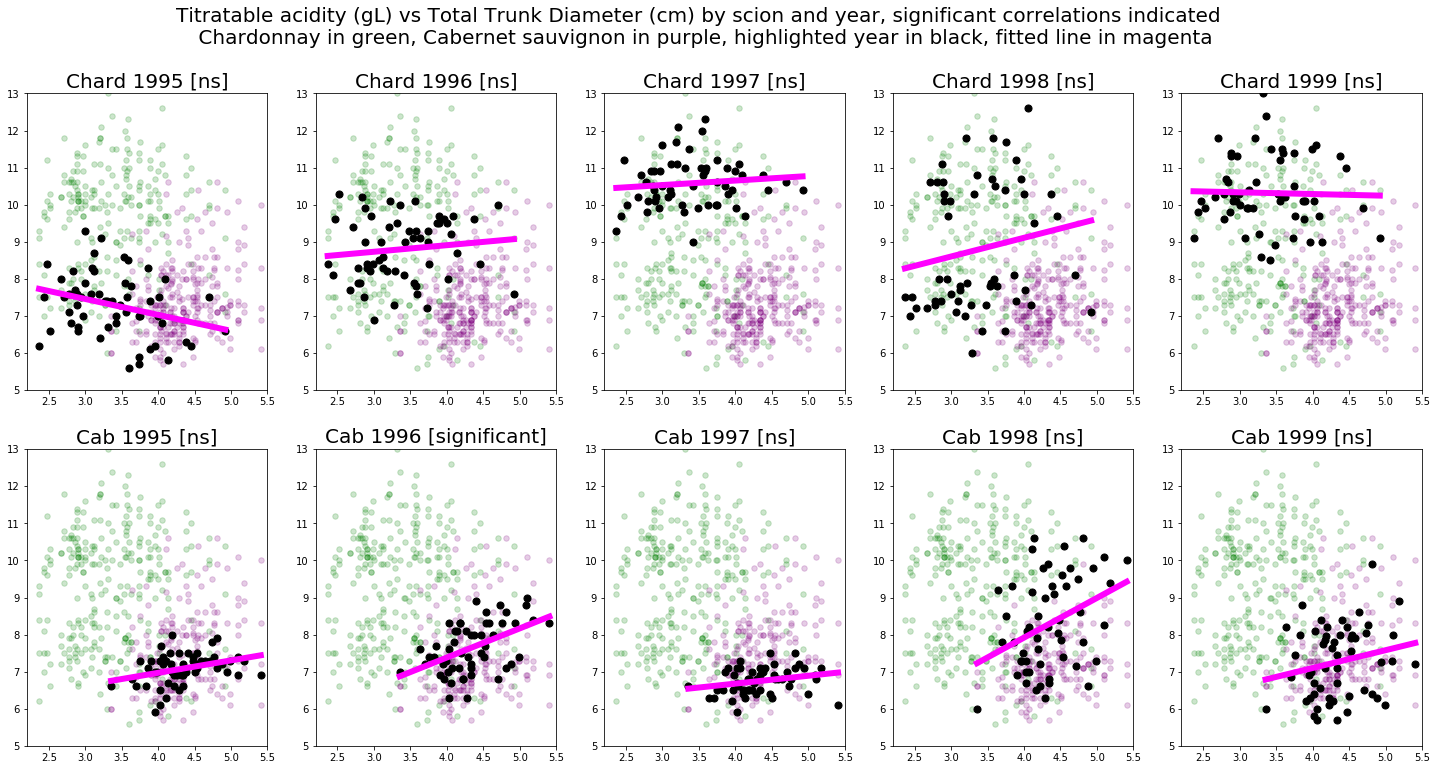

In [19]:
sel_trait = "titratable_acidity_gL" # select the trait to make aa plot for

############################################################
# SELECT CHARDONNAY AND CABERNET SAUVIGNON DATA BY EACH YEAR
############################################################

data_chard = data[(data["scion"]=="Chard")] # select just chardonnay data with a mask
data_chard_1995 = data_chard[(data_chard["year"]==1995)] # select each year of chardonnay data with a mask
data_chard_1996 = data_chard[(data_chard["year"]==1996)]
data_chard_1997 = data_chard[(data_chard["year"]==1997)]
data_chard_1998 = data_chard[(data_chard["year"]==1998)]
data_chard_1999 = data_chard[(data_chard["year"]==1999)]

data_cab = data[(data["scion"]=="Cab")] # select just cabernet sauvignon data with a mask
data_cab_1995 = data_cab[(data_cab["year"]==1995)] # select each year of cabernet sauvignon data with a mask
data_cab_1996 = data_cab[(data_cab["year"]==1996)]
data_cab_1997 = data_cab[(data_cab["year"]==1997)]
data_cab_1998 = data_cab[(data_cab["year"]==1998)]
data_cab_1999 = data_cab[(data_cab["year"]==1999)]

#############################################################
# MODEL DATA AS LINEAR FUNCTION FOR EACH SCION FOR EACH YEAR
#############################################################

chard1995_func = np.poly1d(np.polyfit(data_chard_1995["total_width"],data_chard_1995[sel_trait],1))
chard1996_func = np.poly1d(np.polyfit(data_chard_1996["total_width"],data_chard_1996[sel_trait],1))
chard1997_func = np.poly1d(np.polyfit(data_chard_1997["total_width"],data_chard_1997[sel_trait],1))
# remove nan's from data_chard_1998
idx_chard1998 = np.isfinite(data_chard_1998["total_width"]) & np.isfinite(data_chard_1998[sel_trait])
chard1998_func = np.poly1d(np.polyfit(data_chard_1998["total_width"][idx_chard1998],data_chard_1998[sel_trait][idx_chard1998],1))
chard1999_func = np.poly1d(np.polyfit(data_chard_1998["total_width"],data_chard_1999[sel_trait],1))
cab1995_func = np.poly1d(np.polyfit(data_cab_1995["total_width"],data_cab_1995[sel_trait],1))
cab1996_func = np.poly1d(np.polyfit(data_cab_1996["total_width"],data_cab_1996[sel_trait],1))
cab1997_func = np.poly1d(np.polyfit(data_cab_1997["total_width"],data_cab_1997[sel_trait],1))
cab1998_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1998[sel_trait],1))
cab1999_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1999[sel_trait],1))

#####################
# SET PLOT PARAMETERS
#####################

low_x = 2.2 # lower x axis limit 
high_x = 5.5 # upper x axis limit 
low_y = 5.0 # lower y axis limit 
high_y = 13.0 # upper y axis limit 
alpha_bg = 0.2 # alpha chard/cab background data 
col_chard = "green" # color chardonnay 
col_cab = "purple" # color cabernet 
col_sel = "k" # selected data color 
col_fit = "magenta" # fitted line color
s_sel = 50 # selected data size
s_bg = 30 # background data size
lw_fit = 6 # fitted line width
fs_suptitle = 20 # main title fontsize
fs_subtitle = 20 # subtitle fontsize

###############
# PLOT THE DATA
###############

plt.figure(figsize=(25,12)) # set overall figure size

# Chardonnay

plt.subplot(2,5,1) # Chard 1995
plt.scatter(data_chard_1995["total_width"],data_chard_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100),
        chard1995_func(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,2) # Chard 1996
plt.scatter(data_chard_1996["total_width"],data_chard_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100),
        chard1996_func(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1996 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,3) # Chard 1997
plt.scatter(data_chard_1997["total_width"],data_chard_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100),
        chard1997_func(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1997 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,4) # Chard 1998
plt.scatter(data_chard_1998["total_width"],data_chard_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100),
        chard1998_func(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1998 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,5) # Chard 1999
plt.scatter(data_chard_1999["total_width"],data_chard_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100),
        chard1999_func(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1999 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# Cabernet

plt.subplot(2,5,6) # Cab 1995
plt.scatter(data_cab_1995["total_width"],data_cab_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100),
        cab1995_func(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,7) # Cab 1996
plt.scatter(data_cab_1996["total_width"],data_cab_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100),
        cab1996_func(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1996 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,8) # Cab 1997
plt.scatter(data_cab_1997["total_width"],data_cab_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100),
        cab1997_func(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1997 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,9) # Cab 1998
plt.scatter(data_cab_1998["total_width"],data_cab_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100),
        cab1998_func(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1998 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,10) # Cab 1999
plt.scatter(data_cab_1999["total_width"],data_cab_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100),
        cab1999_func(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1999 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# set overall plot title
plt.suptitle("Titratable acidity (gL) vs Total Trunk Diameter (cm) by scion and year, significant correlations indicated \n Chardonnay in green, Cabernet sauvignon in purple, highlighted year in black, fitted line in magenta", fontsize=fs_suptitle)
plt.savefig("03_titratable_acidity.jpg", bbox_inches="tight")

_____
# YIELD DIVIDED BY PRUNING WEIGHT (RAVAZ INDEX) AND TOTAL TRUNK DIAMETER (cm)
_______

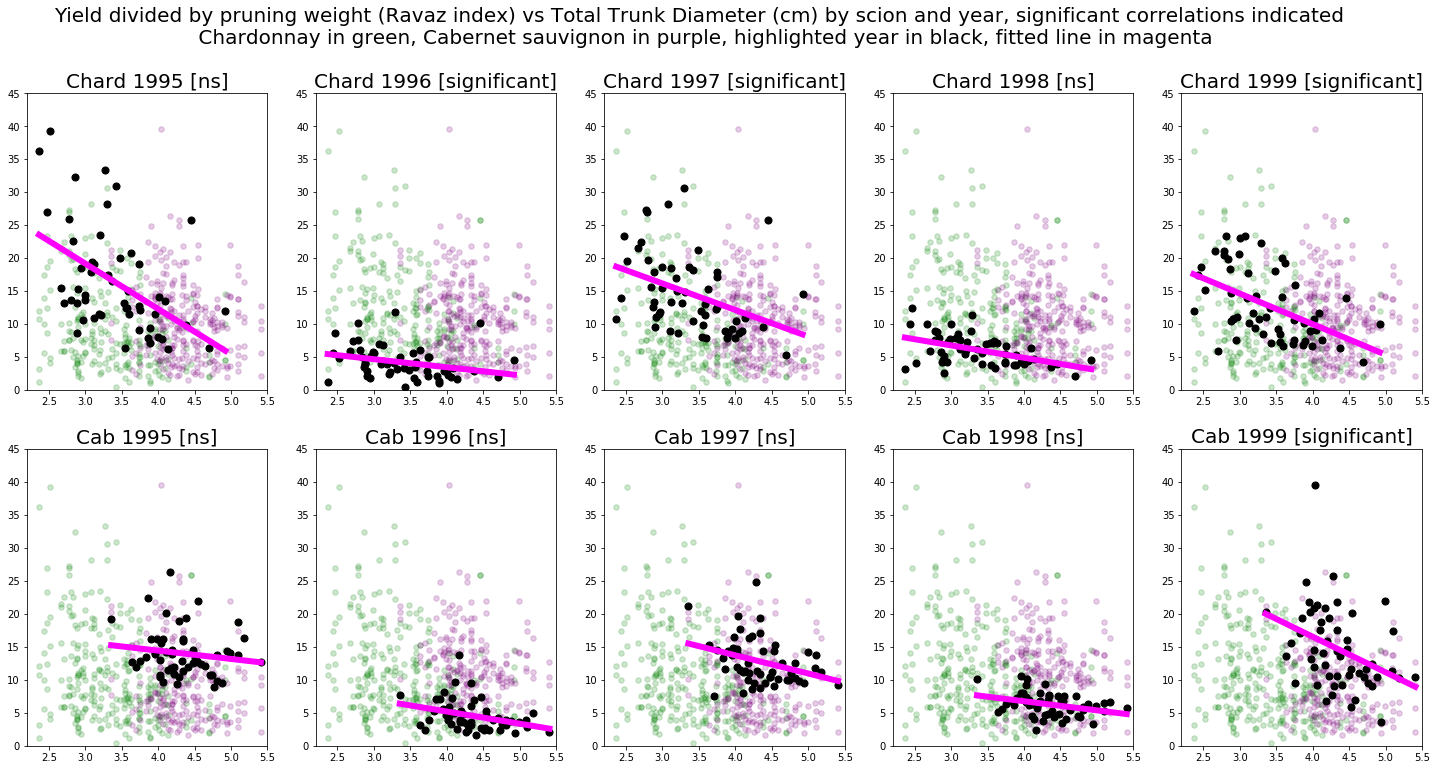

In [20]:
sel_trait = "yield_div_pruning_weight" # select the trait to make aa plot for

############################################################
# SELECT CHARDONNAY AND CABERNET SAUVIGNON DATA BY EACH YEAR
############################################################

data_chard = data[(data["scion"]=="Chard")] # select just chardonnay data with a mask
data_chard_1995 = data_chard[(data_chard["year"]==1995)] # select each year of chardonnay data with a mask
data_chard_1996 = data_chard[(data_chard["year"]==1996)]
data_chard_1997 = data_chard[(data_chard["year"]==1997)]
data_chard_1998 = data_chard[(data_chard["year"]==1998)]
data_chard_1999 = data_chard[(data_chard["year"]==1999)]

data_cab = data[(data["scion"]=="Cab")] # select just cabernet sauvignon data with a mask
data_cab_1995 = data_cab[(data_cab["year"]==1995)] # select each year of cabernet sauvignon data with a mask
data_cab_1996 = data_cab[(data_cab["year"]==1996)]
data_cab_1997 = data_cab[(data_cab["year"]==1997)]
data_cab_1998 = data_cab[(data_cab["year"]==1998)]
data_cab_1999 = data_cab[(data_cab["year"]==1999)]

#############################################################
# MODEL DATA AS LINEAR FUNCTION FOR EACH SCION FOR EACH YEAR
#############################################################

# remove nan's from data_chard_1995
idx_chard1995 = np.isfinite(data_chard_1995["total_width"]) & np.isfinite(data_chard_1995[sel_trait])
chard1995_func = np.poly1d(np.polyfit(data_chard_1995["total_width"][idx_chard1995],data_chard_1995[sel_trait][idx_chard1995],1))
chard1996_func = np.poly1d(np.polyfit(data_chard_1996["total_width"],data_chard_1996[sel_trait],1))
chard1997_func = np.poly1d(np.polyfit(data_chard_1997["total_width"],data_chard_1997[sel_trait],1))
# remove nan's from data_chard_1998
idx_chard1998 = np.isfinite(data_chard_1998["total_width"]) & np.isfinite(data_chard_1998[sel_trait])
chard1998_func = np.poly1d(np.polyfit(data_chard_1998["total_width"][idx_chard1998],data_chard_1998[sel_trait][idx_chard1998],1))
chard1999_func = np.poly1d(np.polyfit(data_chard_1998["total_width"],data_chard_1999[sel_trait],1))
cab1995_func = np.poly1d(np.polyfit(data_cab_1995["total_width"],data_cab_1995[sel_trait],1))
cab1996_func = np.poly1d(np.polyfit(data_cab_1996["total_width"],data_cab_1996[sel_trait],1))
cab1997_func = np.poly1d(np.polyfit(data_cab_1997["total_width"],data_cab_1997[sel_trait],1))
cab1998_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1998[sel_trait],1))
cab1999_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1999[sel_trait],1))

#####################
# SET PLOT PARAMETERS
#####################

low_x = 2.2 # lower x axis limit 
high_x = 5.5 # upper x axis limit 
low_y = 0.0 # lower y axis limit 
high_y = 45.0 # upper y axis limit 
alpha_bg = 0.2 # alpha chard/cab background data 
col_chard = "green" # color chardonnay 
col_cab = "purple" # color cabernet 
col_sel = "k" # selected data color 
col_fit = "magenta" # fitted line color
s_sel = 50 # selected data size
s_bg = 30 # background data size
lw_fit = 6 # fitted line width
fs_suptitle = 20 # main title fontsize
fs_subtitle = 20 # subtitle fontsize

###############
# PLOT THE DATA
###############

plt.figure(figsize=(25,12)) # set overall figure size

# Chardonnay

plt.subplot(2,5,1) # Chard 1995
plt.scatter(data_chard_1995["total_width"],data_chard_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100),
        chard1995_func(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,2) # Chard 1996
plt.scatter(data_chard_1996["total_width"],data_chard_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100),
        chard1996_func(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1996 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,3) # Chard 1997
plt.scatter(data_chard_1997["total_width"],data_chard_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100),
        chard1997_func(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1997 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,4) # Chard 1998
plt.scatter(data_chard_1998["total_width"],data_chard_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100),
        chard1998_func(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1998 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,5) # Chard 1999
plt.scatter(data_chard_1999["total_width"],data_chard_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100),
        chard1999_func(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1999 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# Cabernet

plt.subplot(2,5,6) # Cab 1995
plt.scatter(data_cab_1995["total_width"],data_cab_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100),
        cab1995_func(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,7) # Cab 1996
plt.scatter(data_cab_1996["total_width"],data_cab_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100),
        cab1996_func(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1996 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,8) # Cab 1997
plt.scatter(data_cab_1997["total_width"],data_cab_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100),
        cab1997_func(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1997 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,9) # Cab 1998
plt.scatter(data_cab_1998["total_width"],data_cab_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100),
        cab1998_func(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1998 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,10) # Cab 1999
plt.scatter(data_cab_1999["total_width"],data_cab_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100),
        cab1999_func(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1999 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# set overall plot title
plt.suptitle("Yield divided by pruning weight (Ravaz index) vs Total Trunk Diameter (cm) by scion and year, significant correlations indicated \n Chardonnay in green, Cabernet sauvignon in purple, highlighted year in black, fitted line in magenta", fontsize=fs_suptitle)
plt.savefig("04_Ravaz_index.jpg", bbox_inches="tight")

_____
# PRUNING WEIGHT AND TOTAL TRUNK DIAMETER (cm)
_______

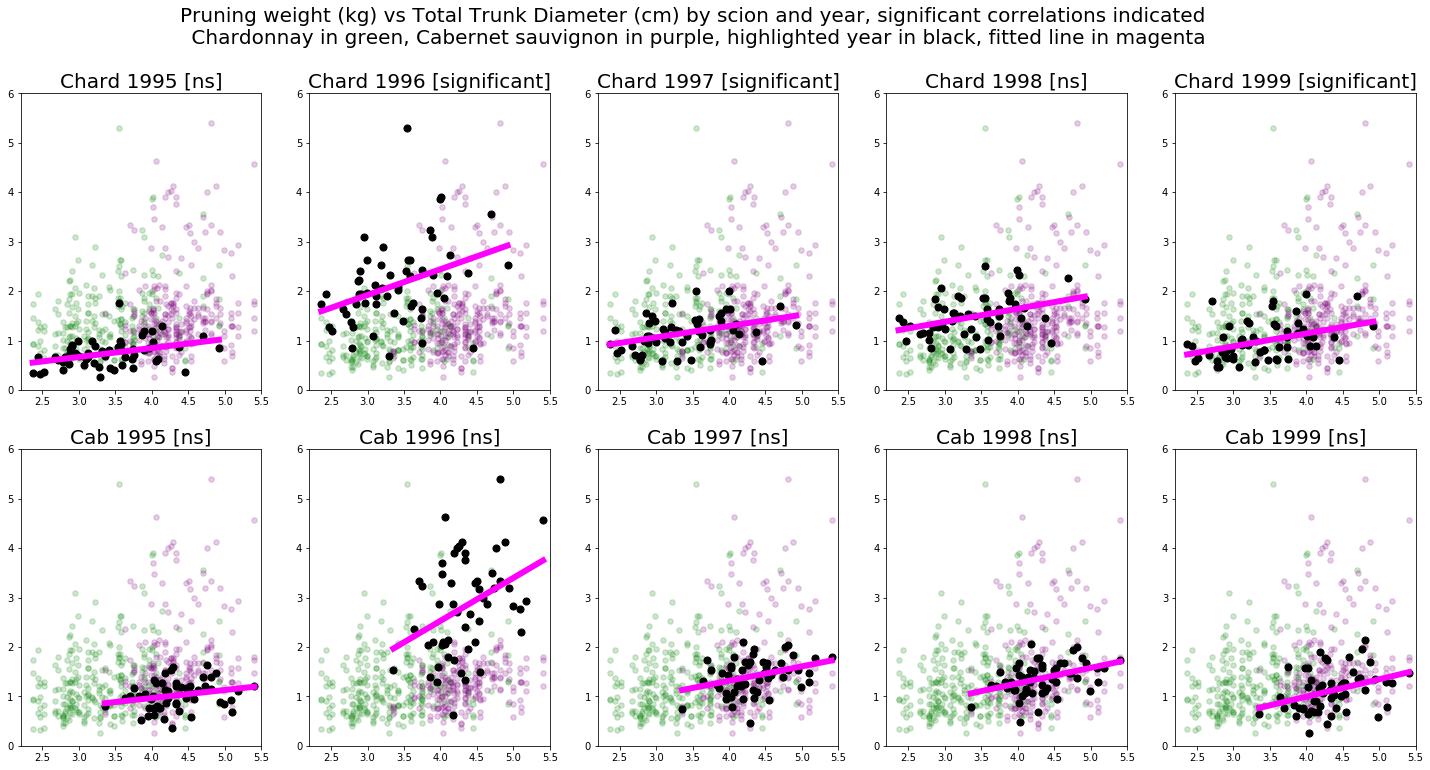

In [21]:
sel_trait = "pruning_weight_kg" # select the trait to make a plot for

############################################################
# SELECT CHARDONNAY AND CABERNET SAUVIGNON DATA BY EACH YEAR
############################################################

data_chard = data[(data["scion"]=="Chard")] # select just chardonnay data with a mask
data_chard_1995 = data_chard[(data_chard["year"]==1995)] # select each year of chardonnay data with a mask
data_chard_1996 = data_chard[(data_chard["year"]==1996)]
data_chard_1997 = data_chard[(data_chard["year"]==1997)]
data_chard_1998 = data_chard[(data_chard["year"]==1998)]
data_chard_1999 = data_chard[(data_chard["year"]==1999)]

data_cab = data[(data["scion"]=="Cab")] # select just cabernet sauvignon data with a mask
data_cab_1995 = data_cab[(data_cab["year"]==1995)] # select each year of cabernet sauvignon data with a mask
data_cab_1996 = data_cab[(data_cab["year"]==1996)]
data_cab_1997 = data_cab[(data_cab["year"]==1997)]
data_cab_1998 = data_cab[(data_cab["year"]==1998)]
data_cab_1999 = data_cab[(data_cab["year"]==1999)]

#############################################################
# MODEL DATA AS LINEAR FUNCTIONN FOR EACH SCION FOR EACH YEAR
#############################################################

chard1995_func = np.poly1d(np.polyfit(data_chard_1995["total_width"],data_chard_1995[sel_trait],1))
chard1996_func = np.poly1d(np.polyfit(data_chard_1996["total_width"],data_chard_1996[sel_trait],1))
chard1997_func = np.poly1d(np.polyfit(data_chard_1997["total_width"],data_chard_1997[sel_trait],1))
chard1998_func = np.poly1d(np.polyfit(data_chard_1998["total_width"],data_chard_1998[sel_trait],1))
chard1999_func = np.poly1d(np.polyfit(data_chard_1998["total_width"],data_chard_1999[sel_trait],1))
cab1995_func = np.poly1d(np.polyfit(data_cab_1995["total_width"],data_cab_1995[sel_trait],1))
cab1996_func = np.poly1d(np.polyfit(data_cab_1996["total_width"],data_cab_1996[sel_trait],1))
cab1997_func = np.poly1d(np.polyfit(data_cab_1997["total_width"],data_cab_1997[sel_trait],1))
cab1998_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1998[sel_trait],1))
cab1999_func = np.poly1d(np.polyfit(data_cab_1998["total_width"],data_cab_1999[sel_trait],1))

#####################
# SET PLOT PARAMETERS
#####################

low_x = 2.2 # lower x axis limit 
high_x = 5.5 # upper x axis limit 
low_y = 0 # lower y axis limit 
high_y = 6 # upper y axis limit 
alpha_bg = 0.2 # alpha chard/cab background data 
col_chard = "green" # color chardonnay 
col_cab = "purple" # color cabernet 
col_sel = "k" # selected data color 
col_fit = "magenta" # fitted line color
s_sel = 50 # selected data size
s_bg = 30 # background data size
lw_fit = 6 # fitted line width
fs_suptitle = 20 # main title fontsize
fs_subtitle = 20 # subtitle fontsize

###############
# PLOT THE DATA
###############

plt.figure(figsize=(25,12)) # set overall figure size

# Chardonnay

plt.subplot(2,5,1) # Chard 1995
plt.scatter(data_chard_1995["total_width"],data_chard_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100),
        chard1995_func(np.linspace(np.min(data_chard_1995["total_width"]),np.max(data_chard_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,2) # Chard 1996
plt.scatter(data_chard_1996["total_width"],data_chard_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100),
        chard1996_func(np.linspace(np.min(data_chard_1996["total_width"]),np.max(data_chard_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1996 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,3) # Chard 1997
plt.scatter(data_chard_1997["total_width"],data_chard_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100),
        chard1997_func(np.linspace(np.min(data_chard_1997["total_width"]),np.max(data_chard_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1997 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,4) # Chard 1998
plt.scatter(data_chard_1998["total_width"],data_chard_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100),
        chard1998_func(np.linspace(np.min(data_chard_1998["total_width"]),np.max(data_chard_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1998 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,5) # Chard 1999
plt.scatter(data_chard_1999["total_width"],data_chard_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100),
        chard1999_func(np.linspace(np.min(data_chard_1999["total_width"]),np.max(data_chard_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Chard 1999 [significant]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# Cabernet

plt.subplot(2,5,6) # Cab 1995
plt.scatter(data_cab_1995["total_width"],data_cab_1995[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100),
        cab1995_func(np.linspace(np.min(data_cab_1995["total_width"]),np.max(data_cab_1995["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1995 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,7) # Cab 1996
plt.scatter(data_cab_1996["total_width"],data_cab_1996[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100),
        cab1996_func(np.linspace(np.min(data_cab_1996["total_width"]),np.max(data_cab_1996["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1996 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,8) # Cab 1997
plt.scatter(data_cab_1997["total_width"],data_cab_1997[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100),
        cab1997_func(np.linspace(np.min(data_cab_1997["total_width"]),np.max(data_cab_1997["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1997 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,9) # Cab 1998
plt.scatter(data_cab_1998["total_width"],data_cab_1998[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100),
        cab1998_func(np.linspace(np.min(data_cab_1998["total_width"]),np.max(data_cab_1998["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1998 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

plt.subplot(2,5,10) # Cab 1999
plt.scatter(data_cab_1999["total_width"],data_cab_1999[sel_trait],zorder=2,c=col_sel,s=s_sel)
plt.plot(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100),
        cab1999_func(np.linspace(np.min(data_cab_1999["total_width"]),np.max(data_cab_1999["total_width"]),100)),
        c=col_fit, lw=lw_fit)
plt.scatter(data_chard["total_width"],data_chard[sel_trait],zorder=1,alpha=alpha_bg,c=col_chard,s=s_bg)
plt.scatter(data_cab["total_width"],data_cab[sel_trait],zorder=1,alpha=alpha_bg,c=col_cab,s=s_bg)
plt.title("Cab 1999 [ns]", fontsize=fs_subtitle)
plt.xlim(low_x, high_x)
plt.ylim(low_y, high_y)

# set overall plot title
plt.suptitle("Pruning weight (kg) vs Total Trunk Diameter (cm) by scion and year, significant correlations indicated \n Chardonnay in green, Cabernet sauvignon in purple, highlighted year in black, fitted line in magenta", fontsize=fs_suptitle)
plt.savefig("05_pruning_weight.jpg", bbox_inches="tight")